<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [3]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 

import os 
import re

from functools import reduce
from collections import defaultdict

from scipy import stats

# Customer Analysis

In [4]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'ab_experiment.csv',
 'groceries.csv',
 'sales.csv',
 'cookie_cats.csv',
 'test.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail_II.xlsx',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'lead_conversion.csv',
 'mall_customers.csv',
 '1_orders_dataset.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'sales_vs_discount.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'app_wau.csv',
 'online_retail.xlsx',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [5]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [7]:
cnt = pd.melt(df, id_vars = ['userid', 'version', 'sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt.head()

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


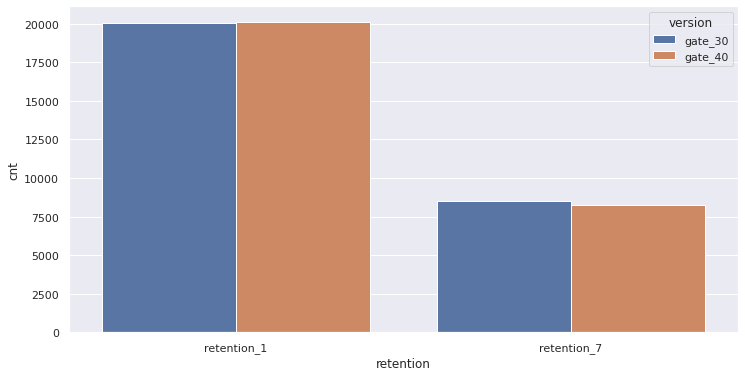

In [9]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

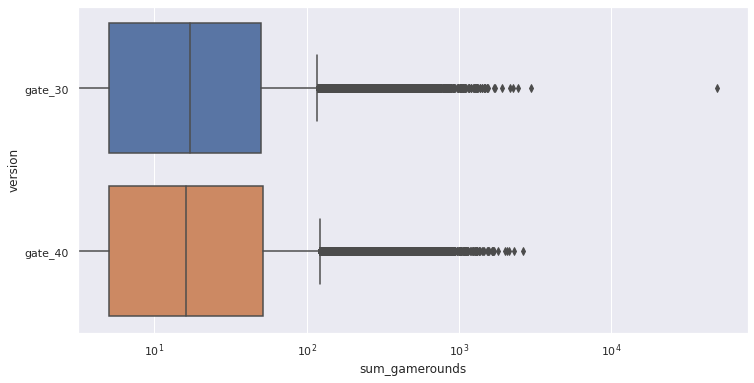

In [15]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [16]:
df = df[df['sum_gamerounds'] < 100000]

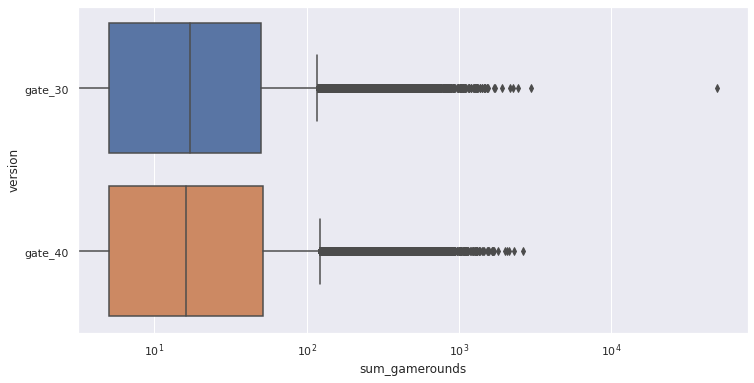

In [17]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

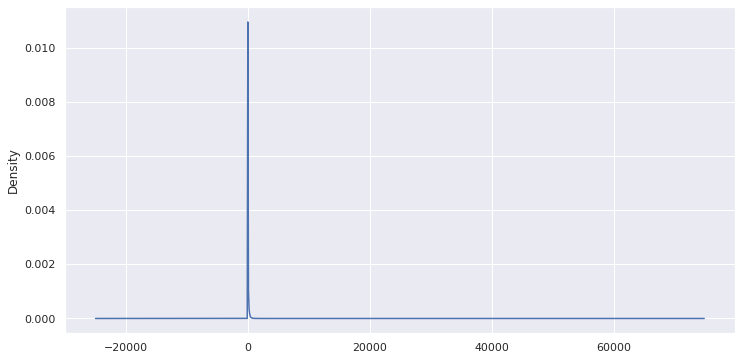

In [18]:
df['sum_gamerounds'].plot.kde()

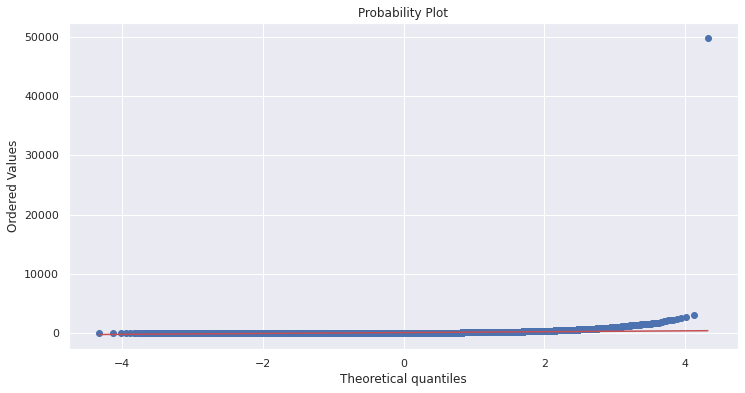

In [24]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [23]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat) + '\n' + str(p))

66146621.50561835
0.0


In [28]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,50.922099,50.688475
sum_gamerounds,52.855342,49.537795
sum_gamerounds,50.529242,51.681336
sum_gamerounds,52.546517,51.558547
sum_gamerounds,52.576717,53.403528


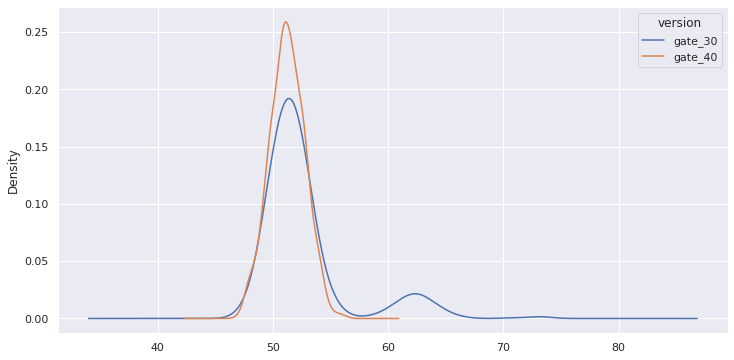

In [29]:
boots.plot.kde()

In [30]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff>0])/n

0.574

# Iterators